<a href="https://colab.research.google.com/github/saurabh98s/ML_gists/blob/main/Bias_and__Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)
X = np.linspace(0,10,100).reshape(-1,1)
y = 3*X**2 + np.random.normal(0,5,size= X.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


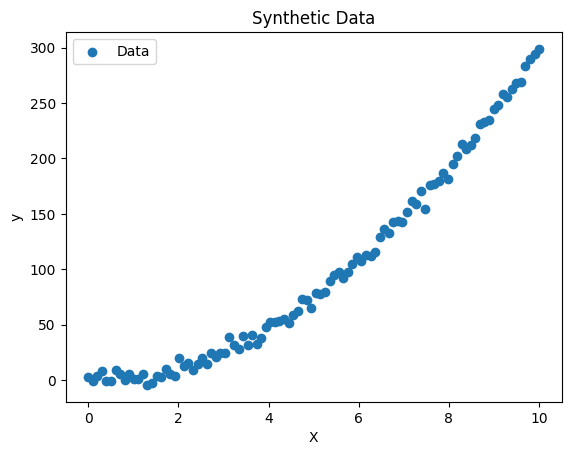

In [ ]:
plt.scatter(X, y, label="Data")
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

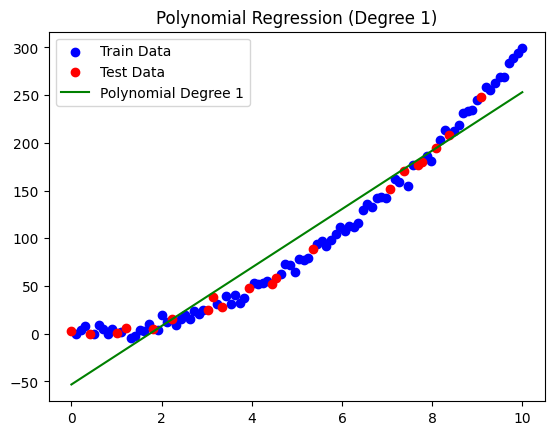

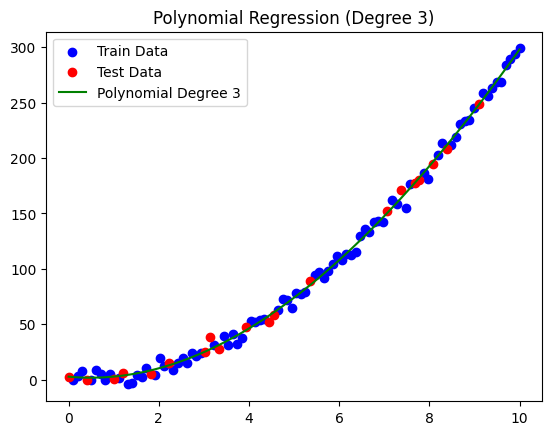

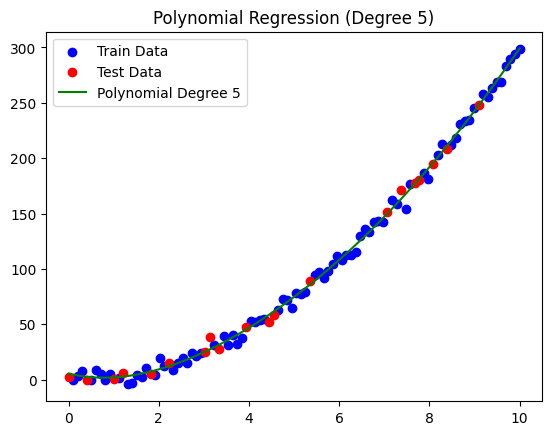

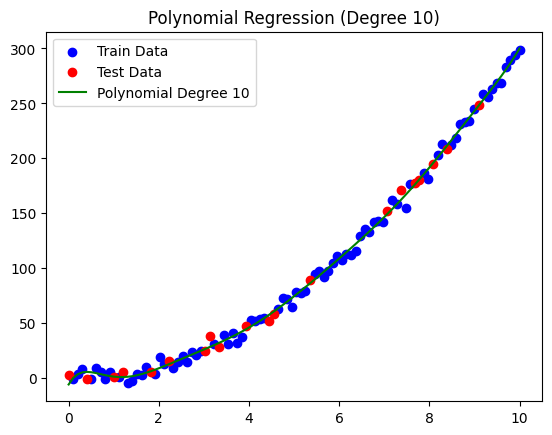

In [ ]:
degrees = [1,3,5,10]
train_errors = []
test_errors = []

for degree in degrees:
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_poly,y_train)

  y_train_pred = model.predict(X_train_poly)
  y_test_pred = model.predict(X_test_poly)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)

  train_errors.append(train_mse)
  test_errors.append(test_mse)

  X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
  X_plot_poly = poly.transform(X_plot)
  y_plot = model.predict(X_plot_poly)

  plt.scatter(X_train, y_train, color='blue', label='Train Data')
  plt.scatter(X_test, y_test, color='red', label='Test Data')
  plt.plot(X_plot, y_plot, color='green', label=f'Polynomial Degree {degree}')
  plt.legend()
  plt.title(f'Polynomial Regression (Degree {degree})')
  plt.show()

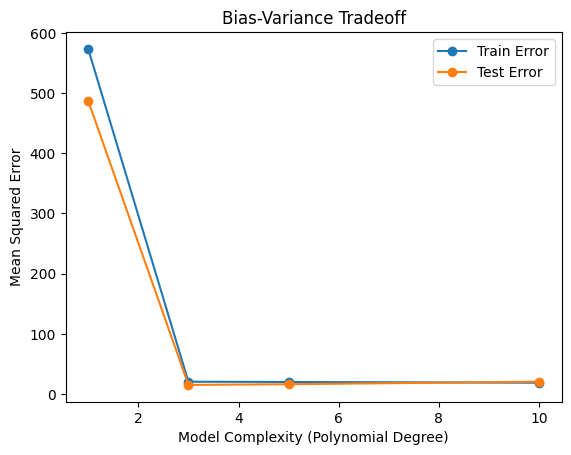

In [20]:
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

In [ ]:
X_test_poly[0]

array([ 1.        ,  8.38383838, 70.28874605])